In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
salesforcourse = pd.read_csv("salesforcourse.csv")

C:\Users\tapab\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\tapab\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [28]:
# Convert Date to datetime format
salesforcourse['Date'] = pd.to_datetime(salesforcourse['Date'])

# Customer Lifetime Value (CLV) Analysis
# Calculate total revenue per customer
total_revenue_per_customer = salesforcourse.groupby('index')['Revenue'].sum()

# Calculate average revenue per customer
avg_revenue_per_customer = total_revenue_per_customer.mean()

# Calculate CLV
clv = avg_revenue_per_customer * 12  # Assuming average customer lifespan is 1 year

print("Average Customer Lifetime Value (CLV):", clv)

Average Customer Lifetime Value (CLV): 7690.441115815527


Churn Rate: 0.5079301345111423


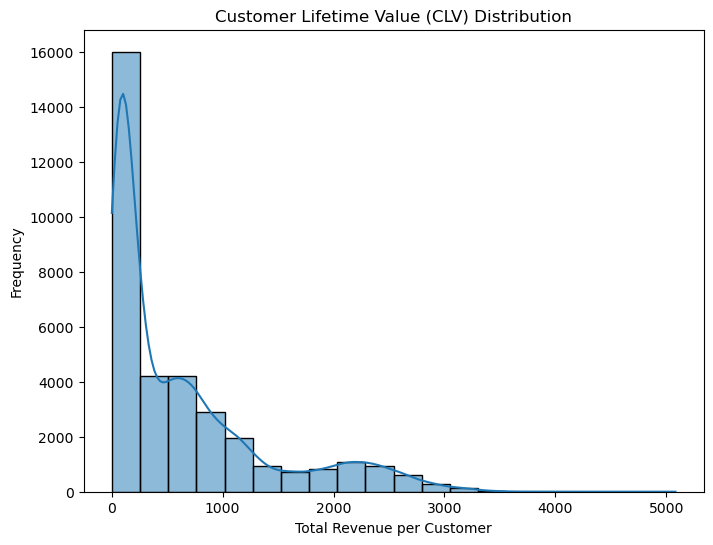

In [29]:
# Churn Analysis
# Identify churned customers as those who have not made a purchase in the last 6 months
last_purchase_date = salesforcourse['Date'].max()
churn_cutoff_date = last_purchase_date - pd.DateOffset(months=6)
churned_customers = salesforcourse[salesforcourse['Date'] < churn_cutoff_date]['index'].unique()

# Calculate churn rate
total_customers = salesforcourse['index'].nunique()
churn_rate = len(churned_customers) / total_customers

print("Churn Rate:", churn_rate)

# Price Sensitivity Analysis
# Calculate price elasticity of demand (PED) for each product category
# PED = (% Change in Quantity Demanded) / (% Change in Price)

# Example:
# Assume there's a 10% decrease in the price of a product category
# Calculate the corresponding percentage change in quantity demanded
# Calculate PED for each product category

# This analysis requires more specific data and assumptions about price changes and quantity demanded.

# Visualizations (Optional)
# Histogram of CLV distribution
plt.figure(figsize=(8, 6))
sns.histplot(total_revenue_per_customer, bins=20, kde=True)
plt.title('Customer Lifetime Value (CLV) Distribution')
plt.xlabel('Total Revenue per Customer')
plt.ylabel('Frequency')
plt.show()


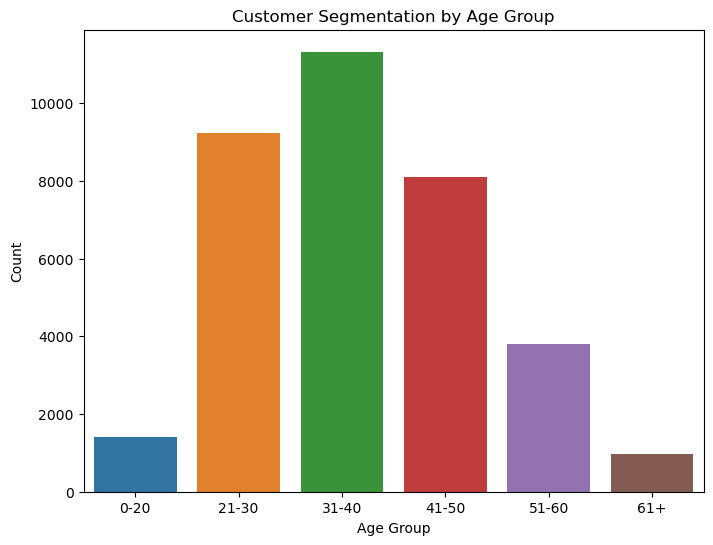

In [30]:
# 4. Market Segmentation
# Segment customers based on demographics or purchasing behavior
# For example, segment customers based on age group, gender, or product category

# Example: Segmentation based on age group
# Define age groups
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
salesforcourse['Age Group'] = pd.cut(salesforcourse['Customer Age'], bins=bins, labels=labels, right=False)

# Visualize segmentation
plt.figure(figsize=(8, 6))
sns.countplot(x='Age Group', data=salesforcourse)
plt.title('Customer Segmentation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [31]:
# 5. Customer Acquisition Cost (CAC) Analysis
# Calculate CAC as the total cost of sales and marketing divided by the number of new customers acquired
# Assume cost of sales and marketing is available in the dataset
total_cost_sales_marketing = salesforcourse['Cost'].sum()  # Total cost of sales and marketing
new_customers_acquired = salesforcourse[salesforcourse['Date'].dt.year == salesforcourse['Date'].dt.year.min()]['index'].nunique()  # Assuming new customers acquired in the first year
cac = total_cost_sales_marketing / new_customers_acquired

print("Customer Acquisition Cost (CAC):", cac)

Customer Acquisition Cost (CAC): 1337.1711831679872


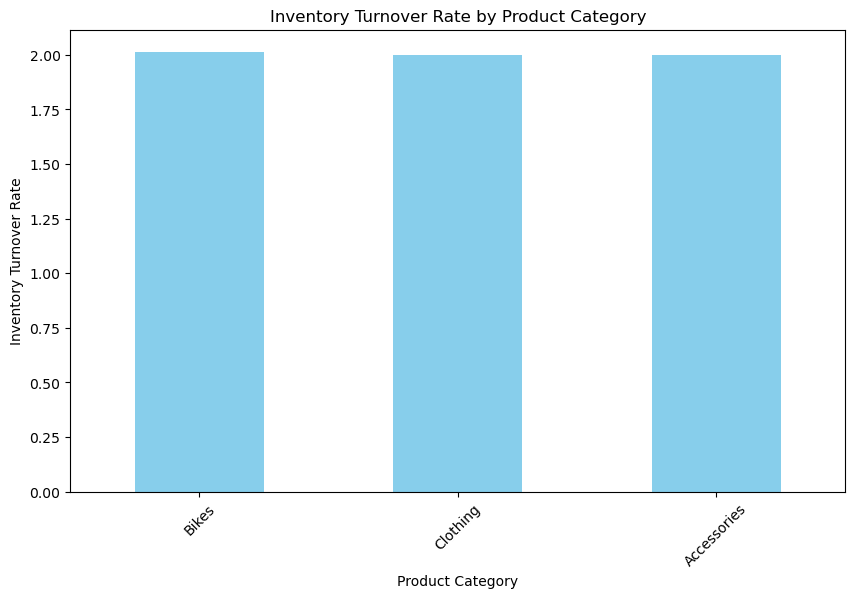

In [32]:
# 7. Inventory Management Analysis
# Analyze inventory turnover rates and identify slow-moving or obsolete inventory
# Calculate inventory turnover rate for each product category
inventory_turnover = salesforcourse.groupby('Product Category')['Quantity'].sum() / salesforcourse.groupby('Product Category')['Quantity'].count()

# Visualize inventory turnover rates
plt.figure(figsize=(10, 6))
inventory_turnover.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Inventory Turnover Rate by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Inventory Turnover Rate')
plt.xticks(rotation=45)
plt.show()


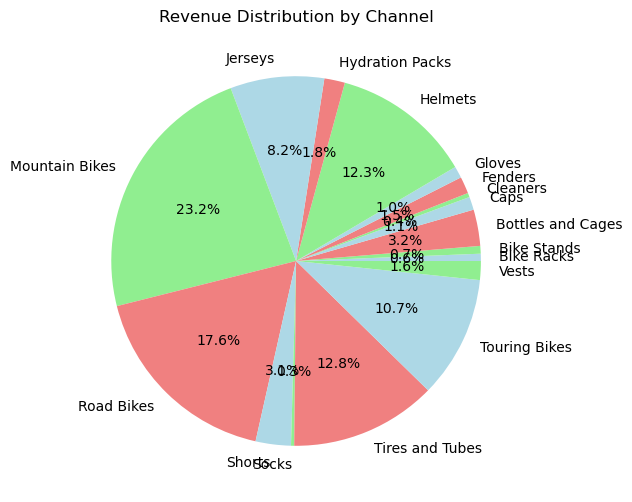

In [33]:
# 9. Channel Performance Analysis
# Evaluate the performance of different sales channels (e.g., online, offline)
# Calculate revenue generated from each channel

# Example: Channel Performance Analysis
# Calculate revenue by channel
channel_revenue = salesforcourse.groupby('Sub Category')['Revenue'].sum()

# Visualize revenue by channel
plt.figure(figsize=(8, 6))
channel_revenue.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Revenue Distribution by Channel')
plt.ylabel('')
plt.show()

In [34]:
# 11. Effectiveness of Promotional Campaigns
# Evaluate the ROI of promotional campaigns
# Compare revenue before and after the launch of promotional campaigns

# Example: Effectiveness of Promotional Campaigns
# Calculate revenue before and after the launch of promotional campaigns
promotion_start_date = pd.to_datetime('2023-01-01')
promotion_end_date = pd.to_datetime('2023-06-01')

revenue_before_promotion = salesforcourse[salesforcourse['Date'] < promotion_start_date]['Revenue'].sum()
revenue_during_promotion = salesforcourse[(salesforcourse['Date'] >= promotion_start_date) & (salesforcourse['Date'] <= promotion_end_date)]['Revenue'].sum()

roi = (revenue_during_promotion - revenue_before_promotion) / revenue_before_promotion * 100

print("ROI of Promotional Campaigns:", roi)

ROI of Promotional Campaigns: -100.0


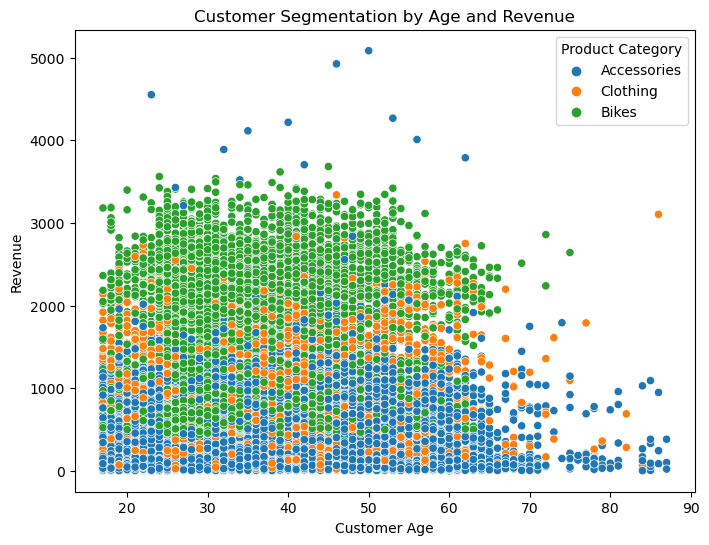

In [35]:
# 12. Customer Segmentation and Personalization
# Implement personalized marketing strategies based on customer segmentation and preferences
# Analyze customer segments and tailor marketing campaigns accordingly

# Example: Customer Segmentation and Personalization
# Segment customers based on demographics or purchasing behavior
# Implement personalized recommendations for each segment

# Visualize segmentation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Customer Age', y='Revenue', hue='Product Category', data=salesforcourse)
plt.title('Customer Segmentation by Age and Revenue')
plt.xlabel('Customer Age')
plt.ylabel('Revenue')
plt.show()

   index        Date    Year     Month  Customer Age Customer Gender  \
0      0   2/19/2016  2016.0  February          29.0               F   
1      1   2/20/2016  2016.0  February          29.0               F   
2      2   2/27/2016  2016.0  February          29.0               F   
3      3  03-12-2016  2016.0     March          29.0               F   
4      4  03-12-2016  2016.0     March          29.0               F   

         Country       State Product Category     Sub Category  Quantity  \
0  United States  Washington      Accessories  Tires and Tubes       1.0   
1  United States  Washington         Clothing           Gloves       2.0   
2  United States  Washington      Accessories  Tires and Tubes       3.0   
3  United States  Washington      Accessories  Tires and Tubes       2.0   
4  United States  Washington      Accessories  Tires and Tubes       3.0   

   Unit Cost  Unit Price   Cost  Revenue  Column1  
0      80.00  109.000000   80.0    109.0      NaN  
1     

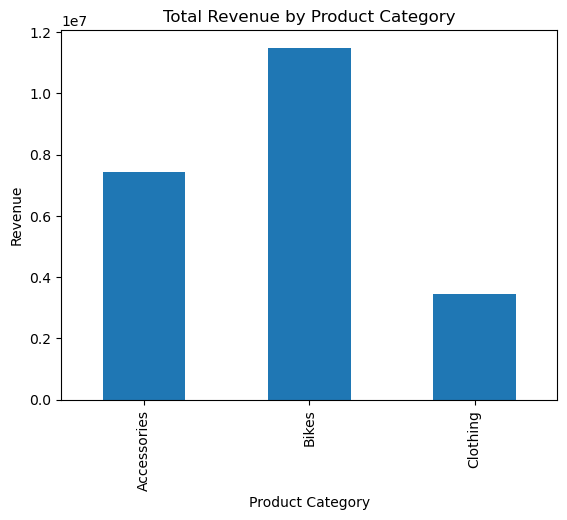

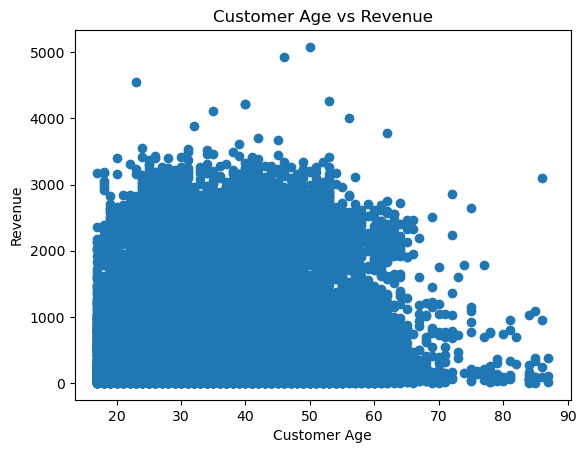

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('salesforcourse.csv')

# Display the first 5 rows of the dataset
print(df.head())

# Display the statistical summary of the dataset
print(df.describe())

# Display the unique values in the 'Customer Gender' column
print(df['Customer Gender'].unique())

# Display the number of unique values in the 'Country' column
print(df['Country'].nunique())

# Group the dataset by 'Product Category' and calculate the total revenue
grouped_df = df.groupby('Product Category')['Revenue'].sum()
print(grouped_df)

# Create a bar plot of the total revenue for each product category
grouped_df.plot(kind='bar')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.show()

# Create a scatter plot of 'Customer Age' vs 'Revenue'
plt.scatter(df['Customer Age'], df['Revenue'])
plt.title('Customer Age vs Revenue')
plt.xlabel('Customer Age')
plt.ylabel('Revenue')
plt.show()

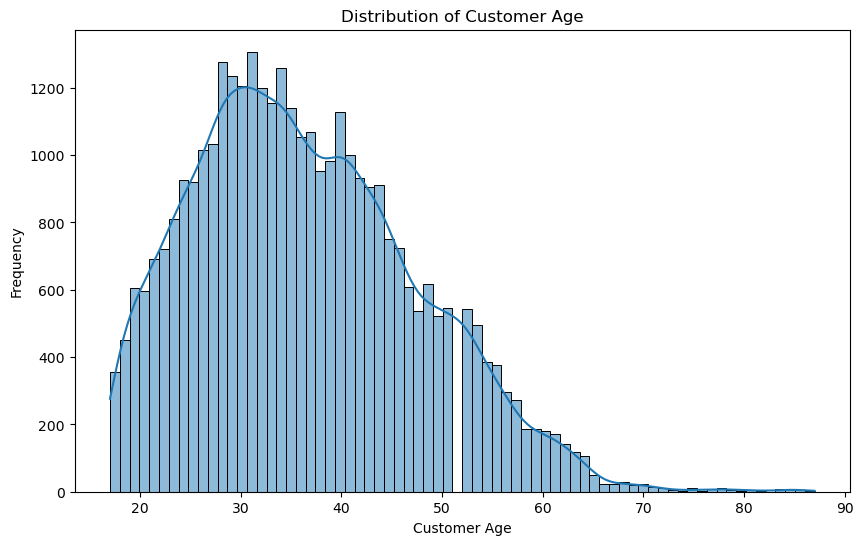

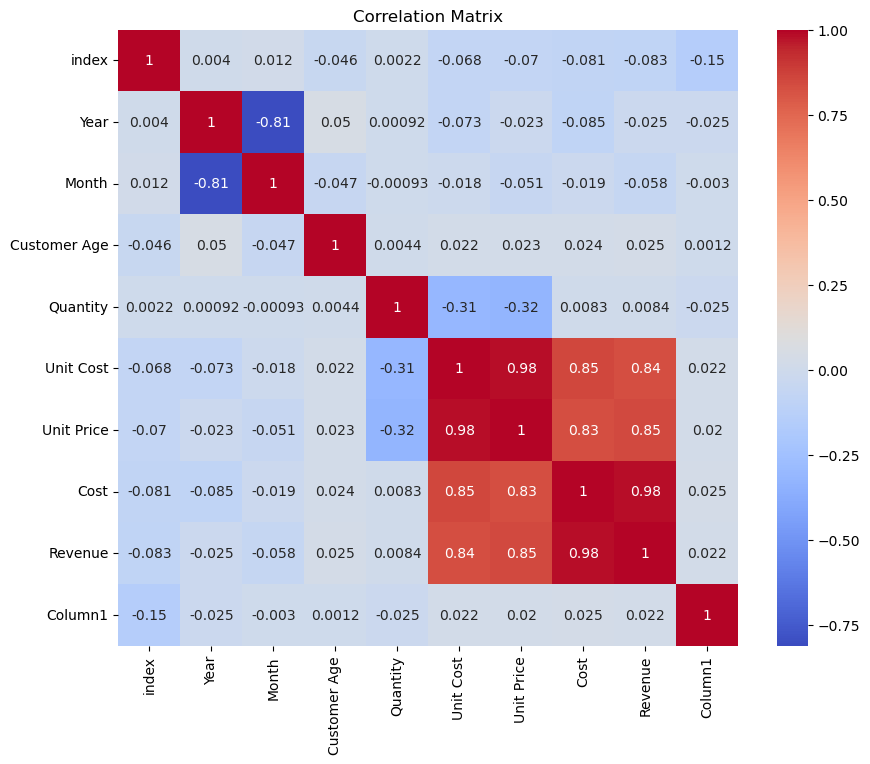

In [37]:
# Clean and preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Customer Age'] = pd.to_numeric(df['Customer Age'], errors='coerce')
df['Unit Cost'] = pd.to_numeric(df['Unit Cost'], errors='coerce')
df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Cost'] = df['Unit Cost'] * df['Quantity']
df['Revenue'] = df['Unit Price'] * df['Quantity']

# Calculate summary statistics
summary_stats = df.describe()

# Analyze the distribution of customer age
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Age'], kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

# Analyze the correlation between variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


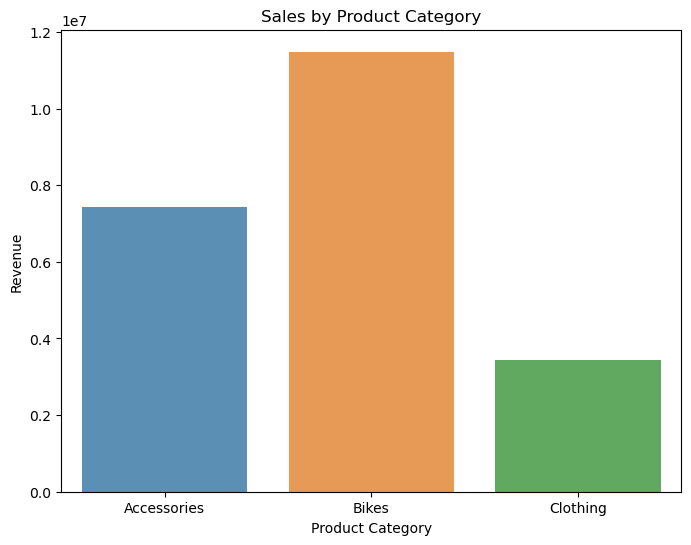

In [38]:
# Analyze the distribution of sales by product category
sales_by_category = df.groupby('Product Category')['Revenue'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, alpha=0.8)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.show()


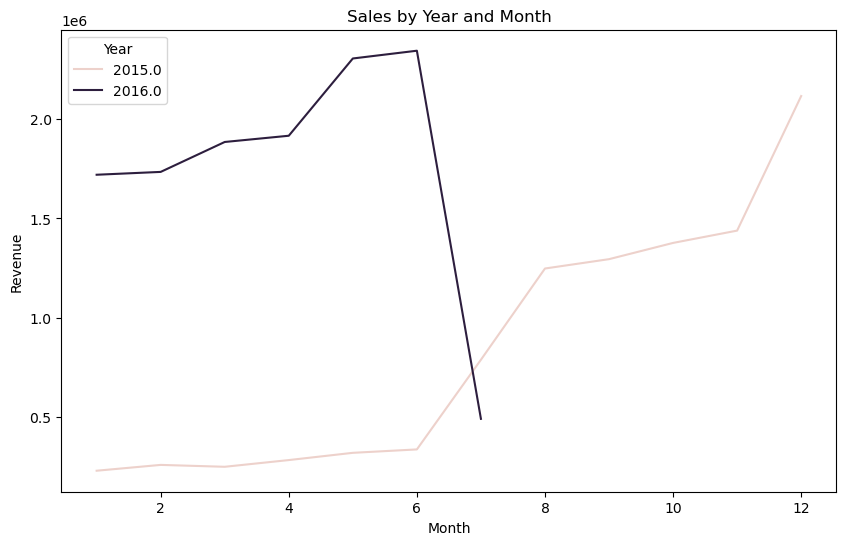

In [39]:
sales_by_month = df.groupby([df['Year'], df['Month']])['Revenue'].sum()
sales_by_month = sales_by_month.reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Revenue', hue='Year', data=sales_by_month)
plt.title('Sales by Year and Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

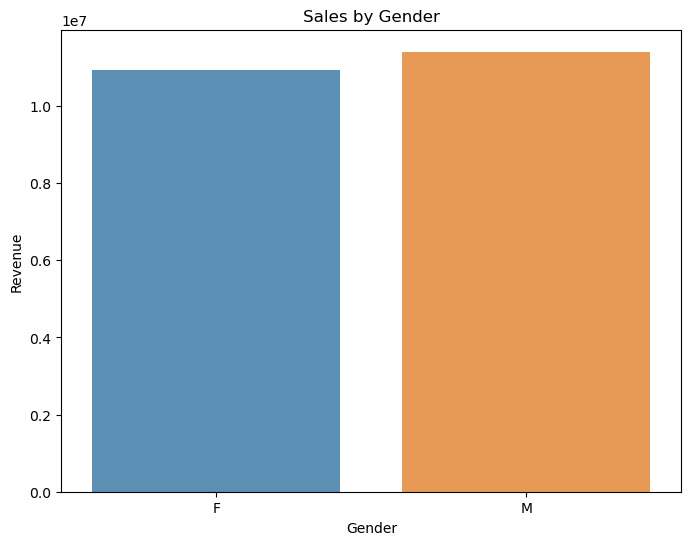

In [40]:
sales_by_gender = df.groupby('Customer Gender')['Revenue'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values, alpha=0.8)
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Revenue')
plt.show()

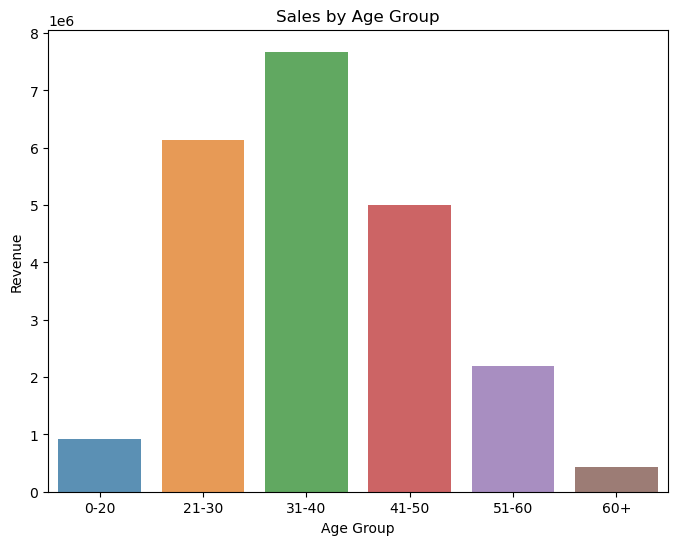

In [41]:
df['Age Group'] = pd.cut(df['Customer Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
sales_by_age_group = df.groupby('Age Group')['Revenue'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_age_group.index, y=sales_by_age_group.values, alpha=0.8)
plt.title('Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Revenue')
plt.show()

C:\Users\tapab\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\tapab\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


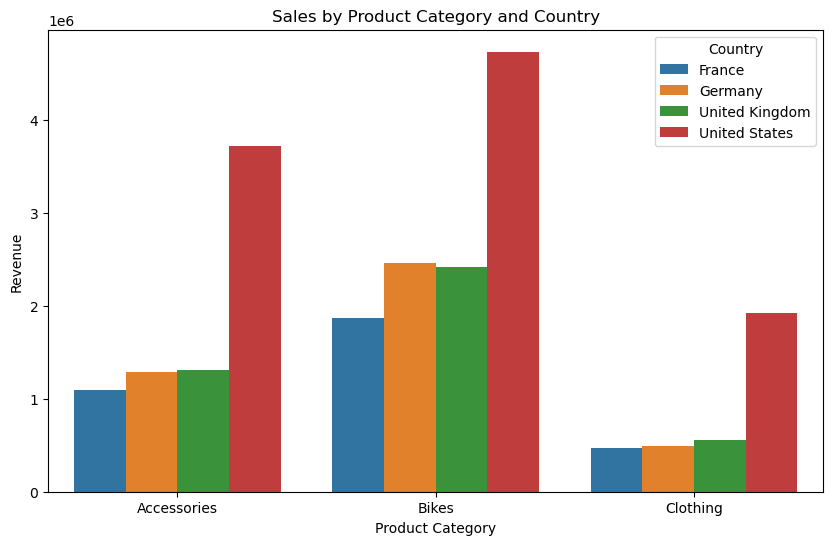

In [42]:
sales_by_category_country = df.groupby(['Product Category', 'Country'])['Revenue'].sum()
sales_by_category_country = sales_by_category_country.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Revenue', hue='Country', data=sales_by_category_country)
plt.title('Sales by Product Category and Country')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.show()

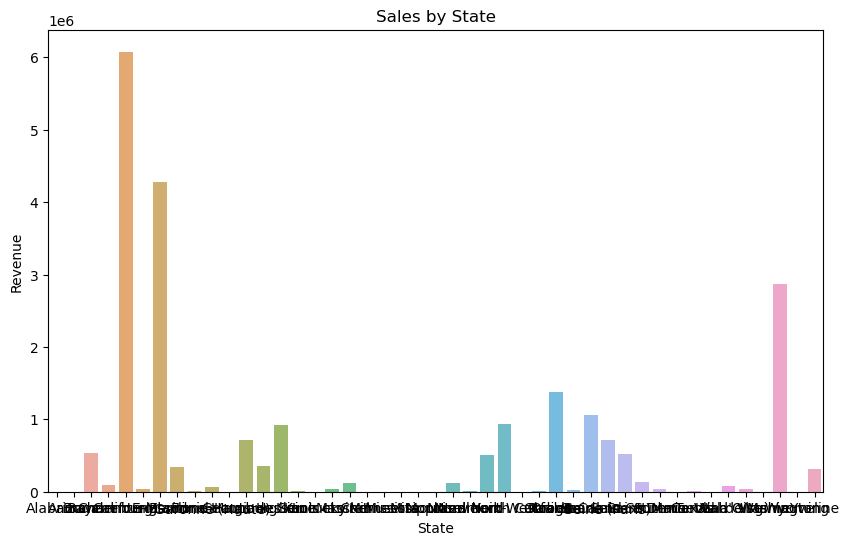

In [43]:
sales_by_state = df.groupby('State')['Revenue'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_state.index, y=sales_by_state.values, alpha=0.8)
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Revenue')
plt.show()

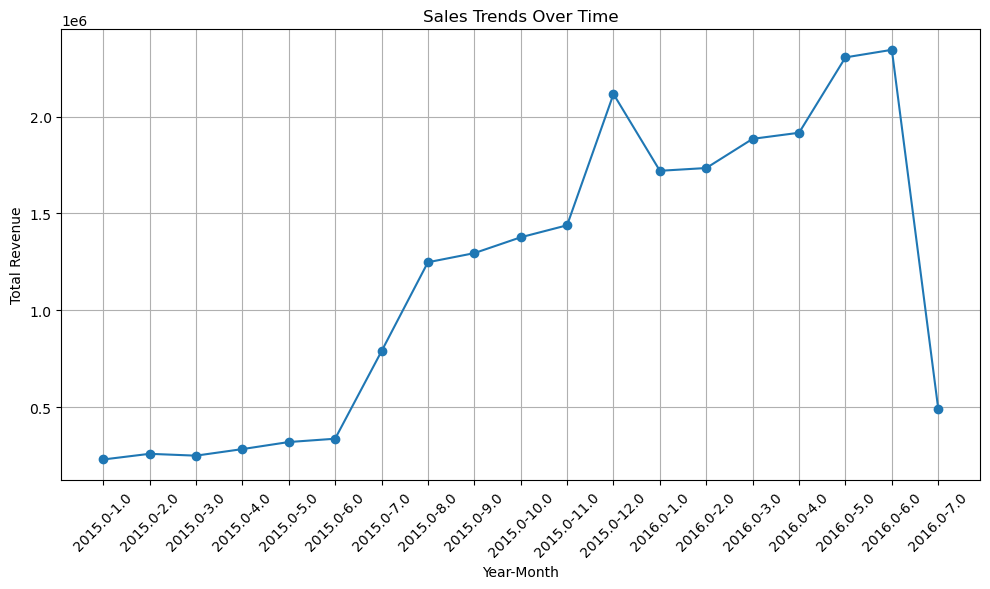

In [44]:
#Sales Trends Over Time
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
sales_data = pd.read_csv("salesforcourse.csv")

# Convert 'Date' column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Extract Year and Month from the Date column
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Month'] = sales_data['Date'].dt.month

# Group by Year and Month and calculate total revenue
monthly_revenue = sales_data.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()

# Plot the sales trends over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month'].astype(str), monthly_revenue['Revenue'], marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

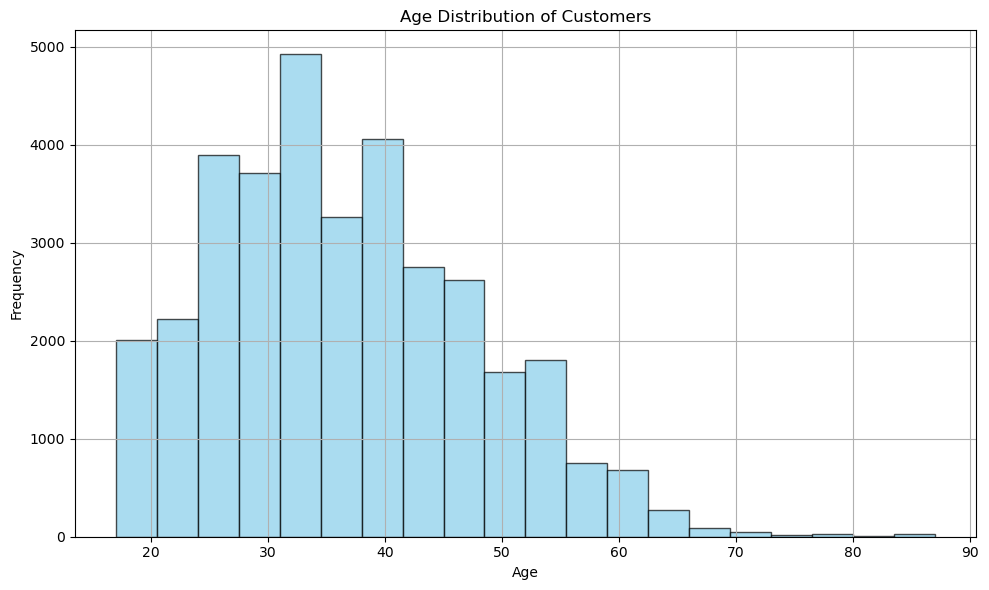

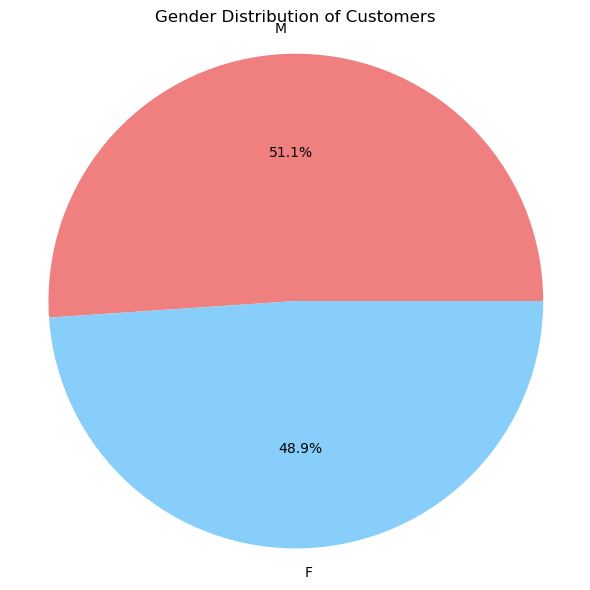

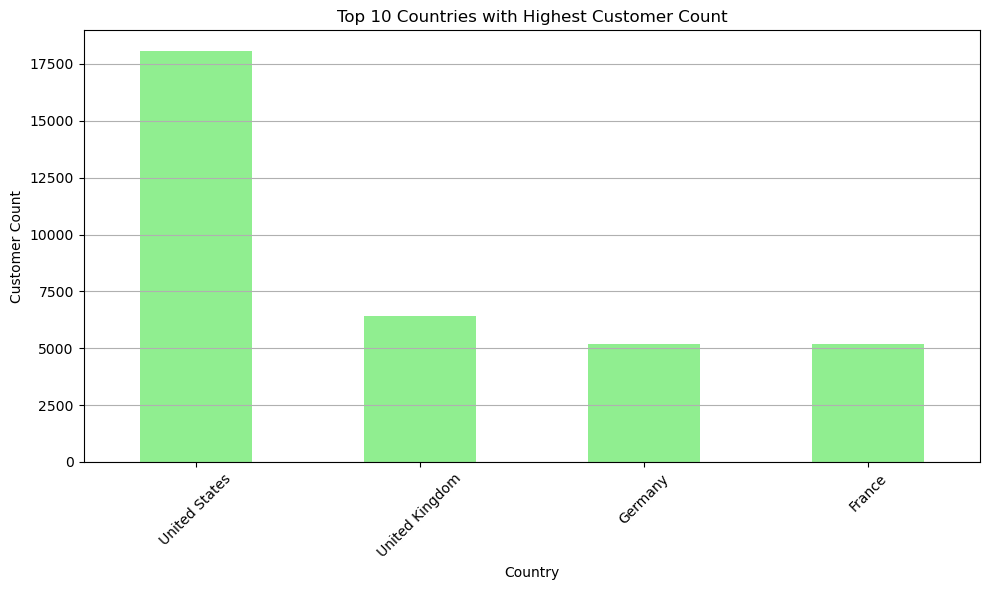

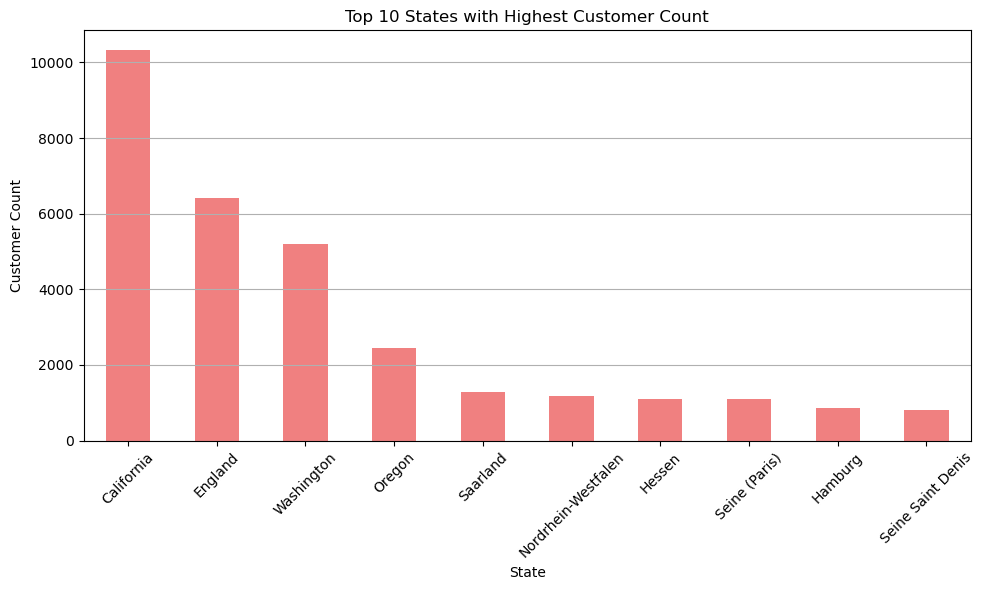

In [45]:
##Customer Demographics Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
sales_data = pd.read_csv("salesforcourse.csv")

# Customer Demographics Analysis
# Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(sales_data['Customer Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gender Distribution
gender_counts = sales_data['Customer Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution of Customers')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Country-wise Distribution
country_counts = sales_data['Country'].value_counts().head(10)  # Top 10 countries
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries with Highest Customer Count')
plt.xlabel('Country')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# State-wise Distribution (if applicable)
if 'State' in sales_data.columns:
    state_counts = sales_data['State'].value_counts().head(10)  # Top 10 states
    plt.figure(figsize=(10, 6))
    state_counts.plot(kind='bar', color='lightcoral')
    plt.title('Top 10 States with Highest Customer Count')
    plt.xlabel('State')
    plt.ylabel('Customer Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

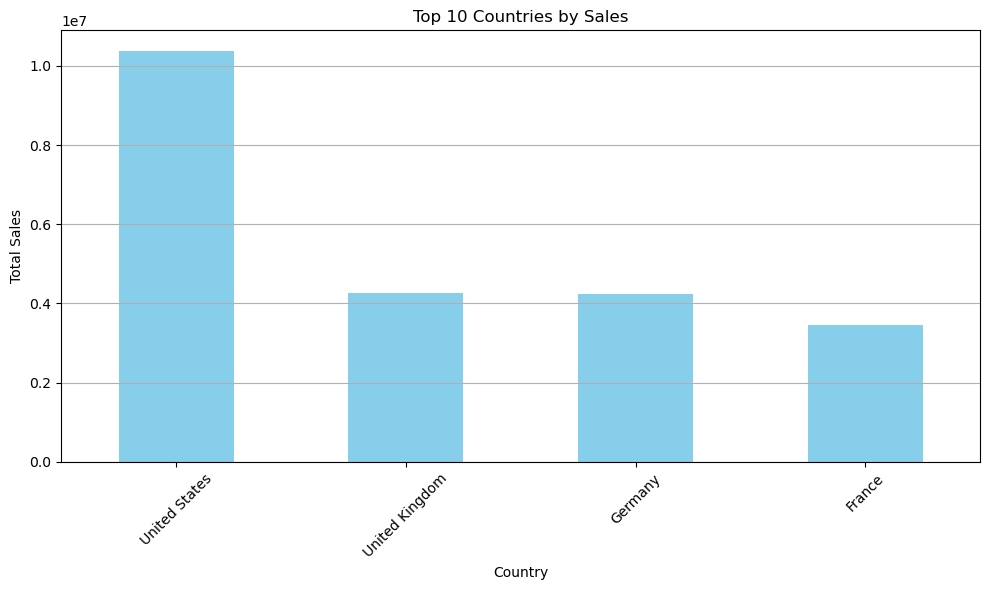

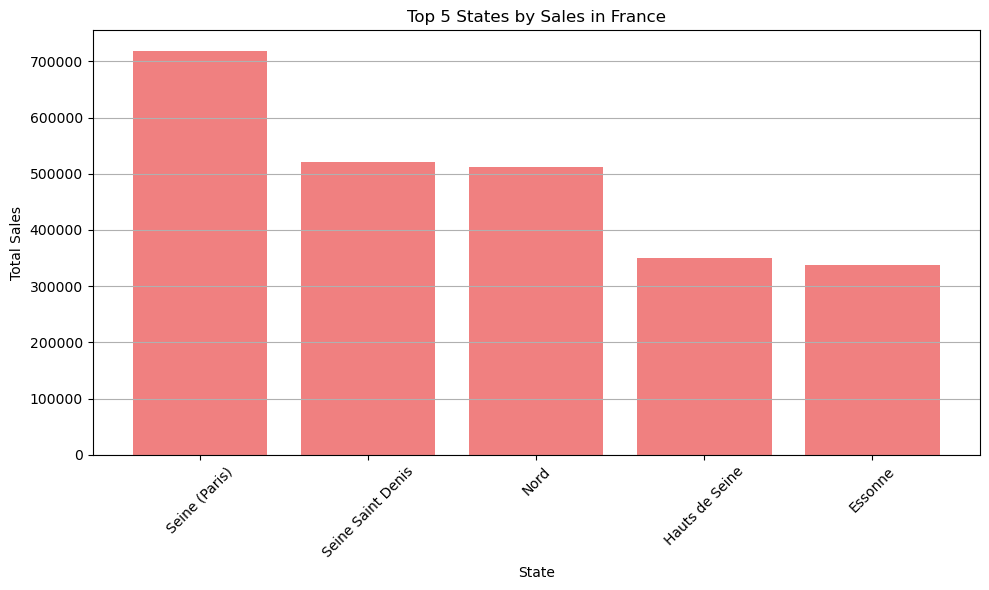

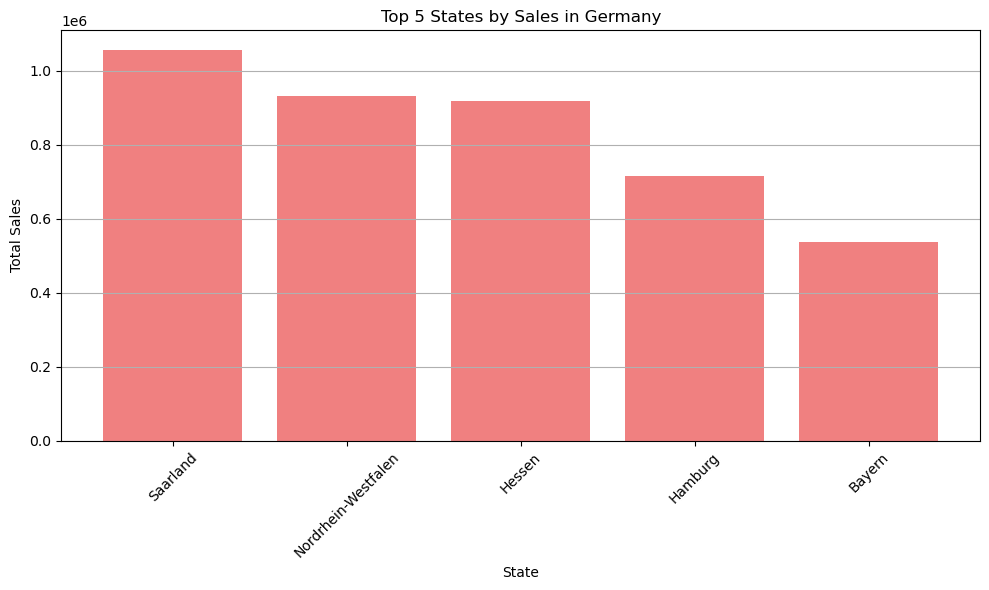

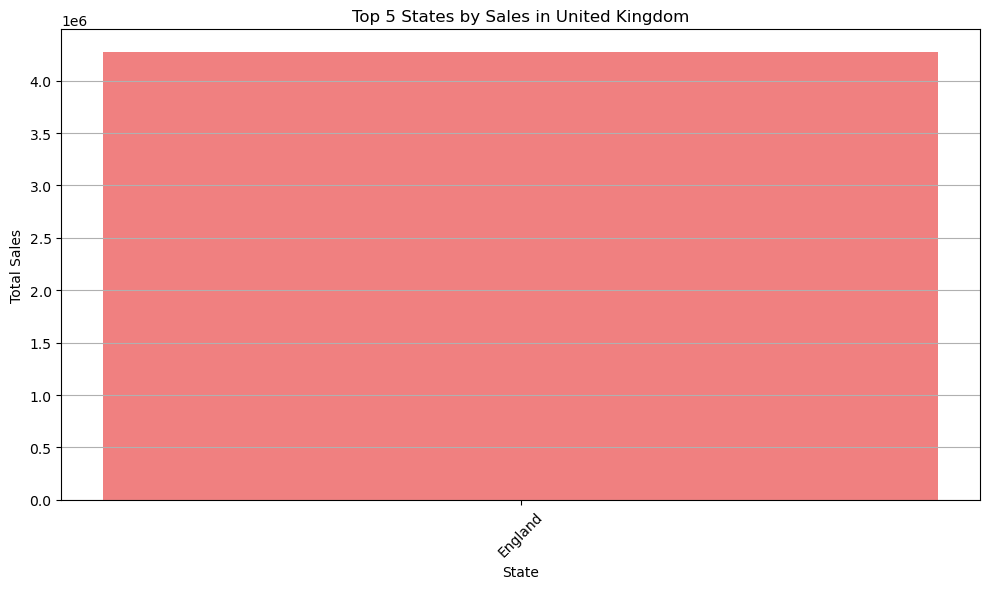

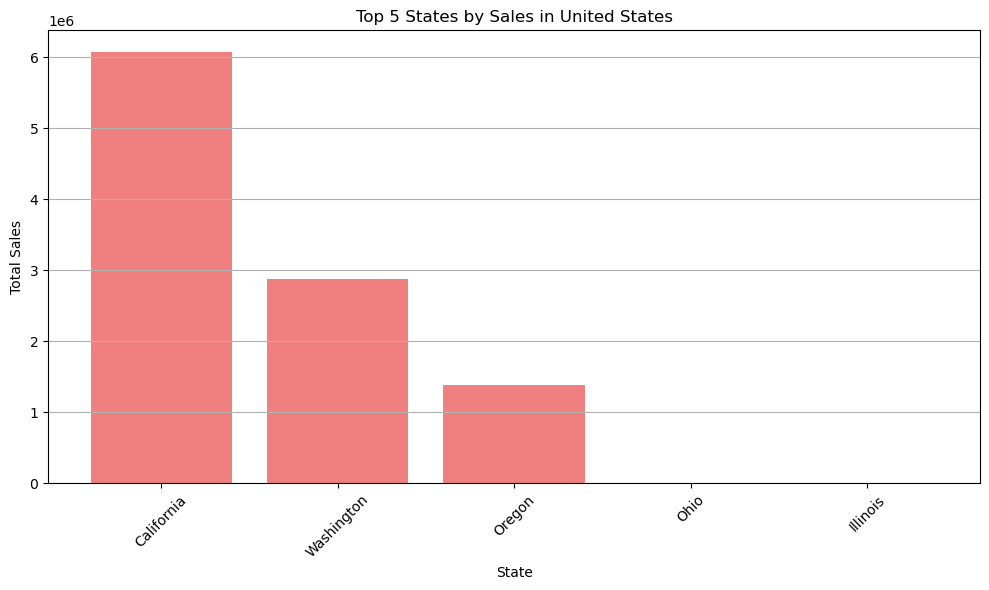

In [46]:
#Geographic Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
sales_data = pd.read_csv("salesforcourse.csv")

# Country-wise Sales Analysis
country_sales = sales_data.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Plotting the top N countries with highest sales
top_countries = 10  # Change this value to adjust the number of top countries to display
plt.figure(figsize=(10, 6))
country_sales.head(top_countries).plot(kind='bar', color='skyblue')
plt.title(f'Top {top_countries} Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# State-wise Sales Analysis (if applicable)
if 'State' in sales_data.columns:
    state_sales = sales_data.groupby(['Country', 'State'])['Revenue'].sum().reset_index()
    # Plotting the top N states with highest sales for each country
    top_states_per_country = 5  # Change this value to adjust the number of top states per country to display
    for country in state_sales['Country'].unique():
        top_states = state_sales[state_sales['Country'] == country].nlargest(top_states_per_country, 'Revenue')
        plt.figure(figsize=(10, 6))
        plt.bar(top_states['State'], top_states['Revenue'], color='lightcoral')
        plt.title(f'Top {top_states_per_country} States by Sales in {country}')
        plt.xlabel('State')
        plt.ylabel('Total Sales')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

C:\Users\tapab\AppData\Local\Temp\ipykernel_10196\2395836914.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_sales = sales_data.groupby('Product Category')['Quantity', 'Revenue'].sum()


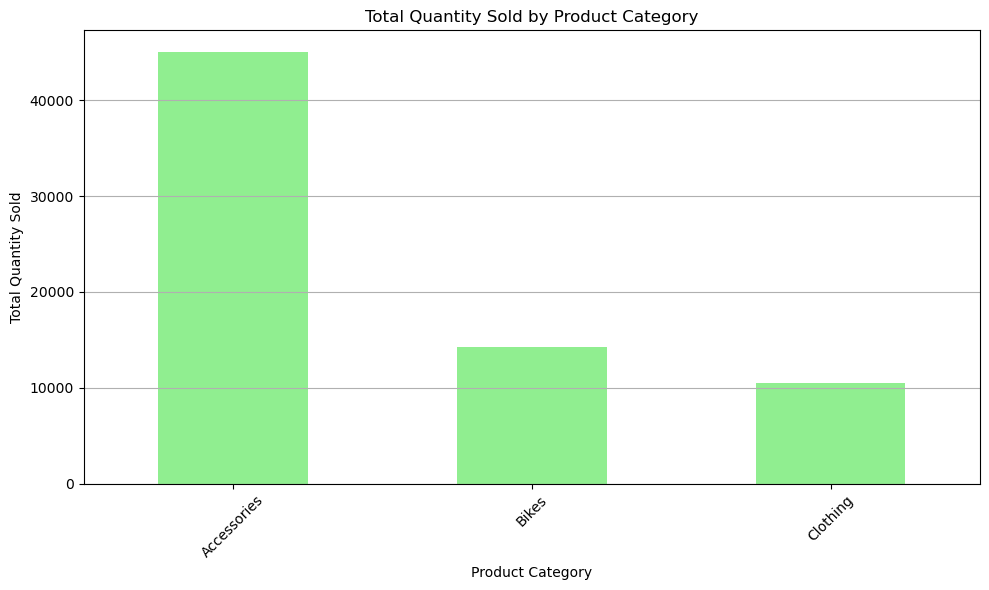

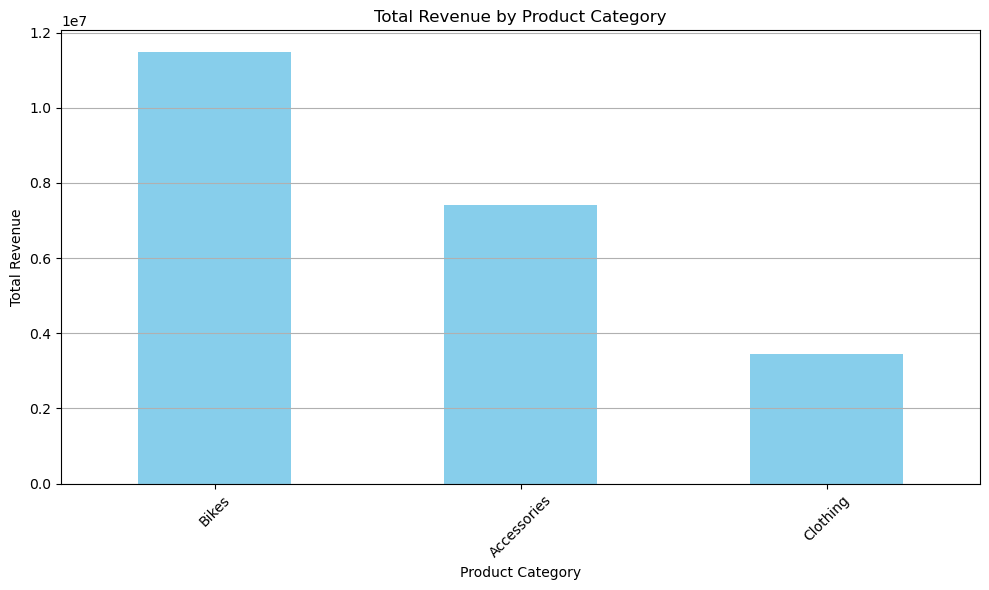

In [6]:
#Product Category Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
sales_data = pd.read_csv("salesforcourse.csv")

# Product Category Analysis
product_sales = sales_data.groupby('Product Category')['Quantity', 'Revenue'].sum()

# Plotting total quantity sold per product category
plt.figure(figsize=(10, 6))
product_sales['Quantity'].sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plotting total revenue generated per product category
plt.figure(figsize=(10, 6))
product_sales['Revenue'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

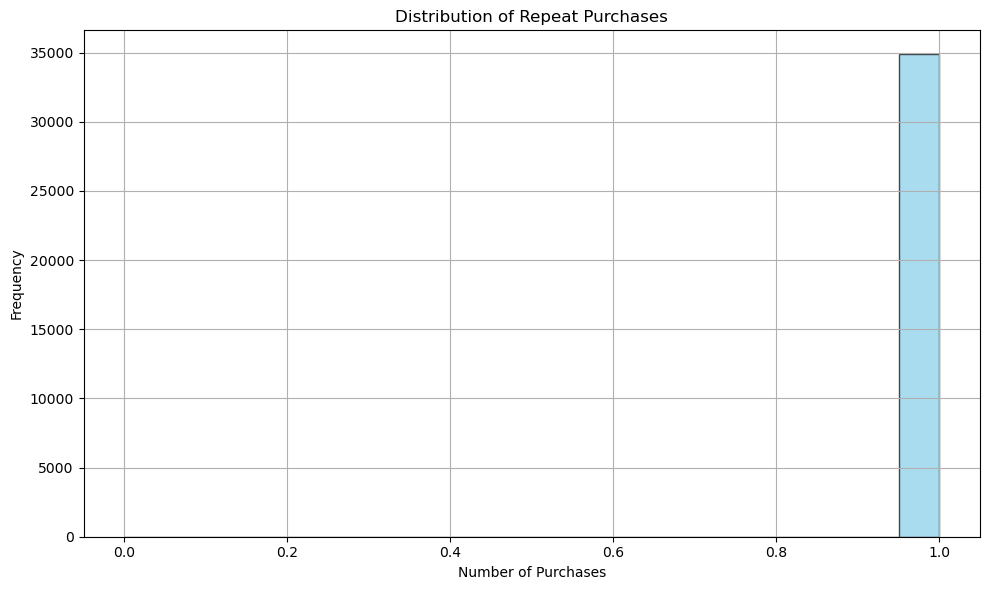

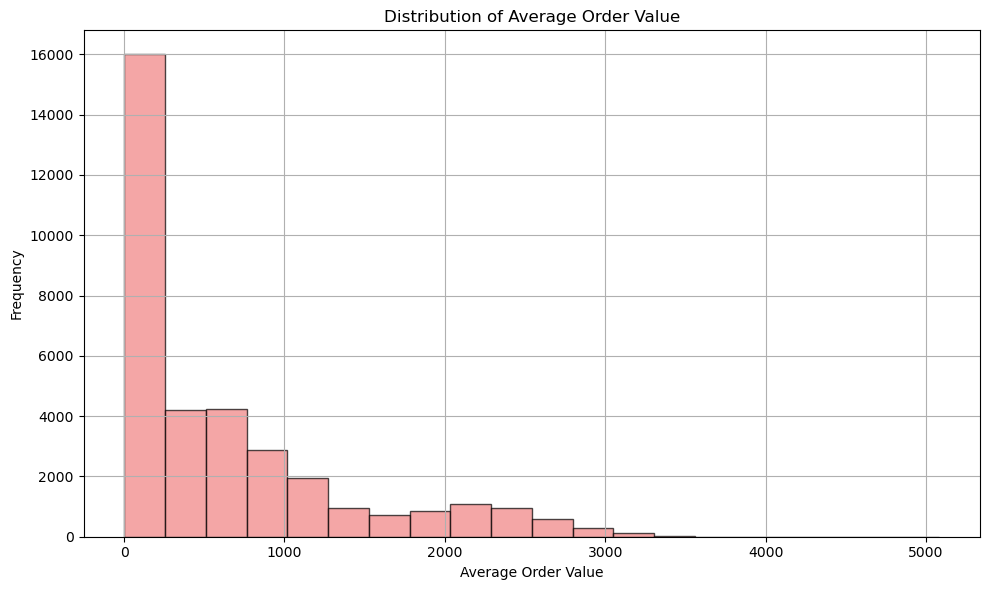

In [9]:
#Customer Behavior Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
sales_data = pd.read_csv("salesforcourse.csv")

# Customer Behavior Analysis

# Repeat Purchases Analysis
repeat_purchases = sales_data.groupby('index')['Date'].count().reset_index()
repeat_purchases.rename(columns={'Date': 'Number of Purchases'}, inplace=True)

# Plotting the distribution of repeat purchases
plt.figure(figsize=(10, 6))
plt.hist(repeat_purchases['Number of Purchases'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Repeat Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Average Order Value Analysis
average_order_value = sales_data.groupby('index')['Revenue'].mean().reset_index()

# Plotting the distribution of average order value
plt.figure(figsize=(10, 6))
plt.hist(average_order_value['Revenue'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Order Value')
plt.xlabel('Average Order Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
#Profitability Analysis
import pandas as pd

# Load the dataset
sales_data = pd.read_csv("salesforcourse.csv")

# Profitability Analysis

# Calculate profit for each transaction
sales_data['Profit'] = sales_data['Revenue'] - sales_data['Cost']

# Overall profitability analysis
total_profit = sales_data['Profit'].sum()
print("Total Profit:", total_profit)

# Profitability analysis by product category
profit_by_category = sales_data.groupby('Product Category')['Profit'].sum()
print("\nProfitability by Product Category:")
print(profit_by_category)

# Profitability analysis by country
profit_by_country = sales_data.groupby('Country')['Profit'].sum()
print("\nProfitability by Country:")
print(profit_by_country)

# Profitability analysis by year
profit_by_year = sales_data.groupby('Year')['Profit'].sum()
print("\nProfitability by Year:")
print(profit_by_year)

# Profitability analysis by month
profit_by_month = sales_data.groupby(['Year', 'Month'])['Profit'].sum()
print("\nProfitability by Month:")
print(profit_by_month)

Total Profit: 2261602.0

Profitability by Product Category:
Product Category
Accessories    1378769.0
Bikes           337601.0
Clothing        545232.0
Name: Profit, dtype: float64

Profitability by Country:
Country
France            272657.0
Germany           958825.0
United Kingdom    328955.0
United States     701165.0
Name: Profit, dtype: float64

Profitability by Year:
Year
2015.0     288620.0
2016.0    1972982.0
Name: Profit, dtype: float64

Profitability by Month:
Year    Month    
2015.0  April         -4946.0
        August        65926.0
        December      67448.0
        February      -4080.0
        January       -5779.0
        July          15104.0
        June          -8691.0
        March         -8164.0
        May           -7802.0
        November      54481.0
        October       62951.0
        September     62172.0
2016.0  April        307746.0
        February     263640.0
        January      280204.0
        July         107152.0
        June         35754

In [11]:
#Price Elasticity Analysis
import pandas as pd

# Load the dataset
sales_data = pd.read_csv("salesforcourse.csv")

# Calculate total quantity sold
sales_data['Total Quantity'] = sales_data['Quantity'].sum()

# Calculate price elasticity
# Assuming revenue is proportional to quantity sold, we use revenue as a proxy for quantity
# Elasticity = (% Change in Quantity) / (% Change in Price)
initial_revenue = sales_data['Revenue'].sum()
initial_price = sales_data['Unit Price'].mean()

# Increase price by 1% (you can change this value based on your preference)
new_price = initial_price * 1.01

# Simulate new revenue based on the price increase
sales_data['New Revenue'] = (sales_data['Unit Price'] / initial_price) * sales_data['Revenue']
new_revenue = sales_data['New Revenue'].sum()

# Calculate percentage change in price and quantity sold
percentage_change_price = ((new_price - initial_price) / initial_price) * 100
percentage_change_revenue = ((new_revenue - initial_revenue) / initial_revenue) * 100

# Calculate price elasticity
price_elasticity = percentage_change_revenue / percentage_change_price

print("Initial Price:", initial_price)
print("New Price:", new_price)
print("Percentage Change in Price:", percentage_change_price)
print("Percentage Change in Revenue:", percentage_change_revenue)
print("Price Elasticity:", price_elasticity)


Initial Price: 389.232485323526
New Price: 393.1248101767613
Percentage Change in Price: 1.0000000000000013
Percentage Change in Revenue: 132.01343099008557
Price Elasticity: 132.0134309900854


In [14]:
#Market Basket Analysis
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load the dataset
sales_data = pd.read_csv("salesforcourse.csv")

# Group transactions by date and product category
transaction_data = sales_data.groupby(['Date', 'Product Category'])['Quantity'].sum().unstack().fillna(0)

# Convert quantity to binary format (1 if purchased, 0 otherwise)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = transaction_data.applymap(encode_units)

# Generate frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
    support                        itemsets
0  0.687500                   (Accessories)
1  0.946181                         (Bikes)
2  0.685764                      (Clothing)
3  0.633681            (Bikes, Accessories)
4  0.685764         (Clothing, Accessories)
5  0.631944               (Bikes, Clothing)
6  0.631944  (Bikes, Clothing, Accessories)

Association Rules:
            antecedents           consequents  antecedent support  \
0            (Clothing)         (Accessories)            0.685764   
1         (Accessories)            (Clothing)            0.687500   
2     (Bikes, Clothing)         (Accessories)            0.631944   
3  (Bikes, Accessories)            (Clothing)            0.633681   
4            (Clothing)  (Bikes, Accessories)            0.685764   
5         (Accessories)     (Bikes, Clothing)            0.687500   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.687500  0.685764    1.000000  1

C:\Users\tapab\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [13]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 5.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Average Revenue per Customer: 640.8700929846273


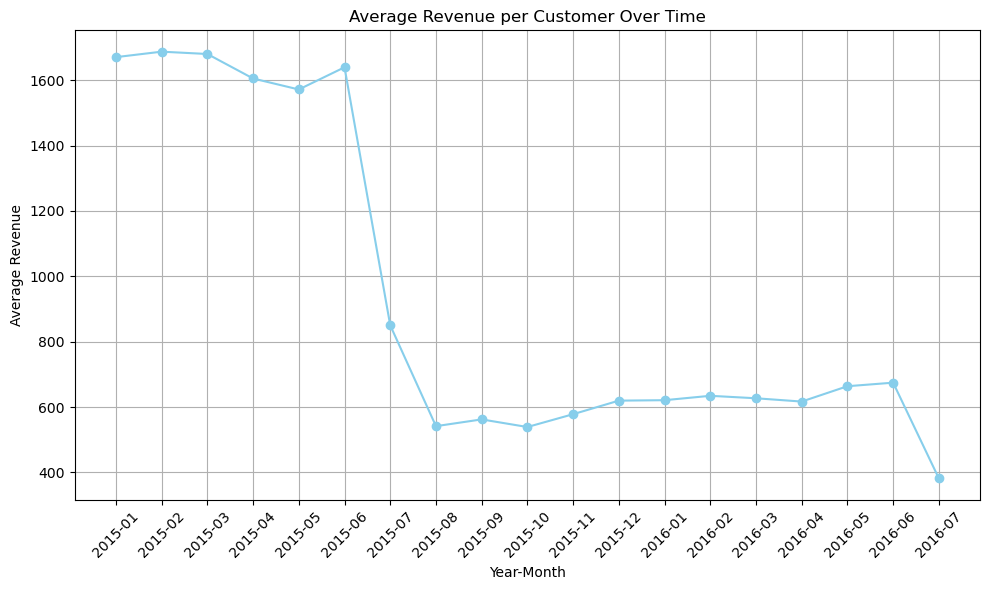

In [20]:
#Customer Lifetime Value (CLV)
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
sales_data = pd.read_csv("salesforcourse.csv")

# Group data by customer and calculate total revenue per customer
customer_revenue = sales_data.groupby('index')['Revenue'].sum()

# Calculate average revenue per customer
avg_revenue_per_customer = customer_revenue.mean()

print("Average Revenue per Customer:", avg_revenue_per_customer)

# Plotting average revenue per customer over time (assuming Date column represents transaction dates)
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['YearMonth'] = sales_data['Date'].dt.to_period('M')
avg_revenue_over_time = sales_data.groupby('YearMonth')['Revenue'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_revenue_over_time.index.astype(str), avg_revenue_over_time.values, marker='o', color='skyblue')
plt.title('Average Revenue per Customer Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
#Customer satisfaction analysis
import pandas as pd

# Load the dataset
sales_data = pd.read_csv("salesforcourse.csv")

# Group transactions by customer and count the number of unique dates (indicating repeat purchases)
repeat_purchase_counts = sales_data.groupby('index')['Date'].nunique()

# Calculate the percentage of customers who made repeat purchases
total_customers = len(repeat_purchase_counts)
repeat_customers = sum(repeat_purchase_counts > 1)
repeat_customer_percentage = (repeat_customers / total_customers) * 100

print("Total Customers:", total_customers)
print("Customers with Repeat Purchases:", repeat_customers)
print("Percentage of Repeat Customers:", repeat_customer_percentage)


Total Customers: 34867
Customers with Repeat Purchases: 0
Percentage of Repeat Customers: 0.0


C:\Users\tapab\AppData\Local\Temp\ipykernel_10196\1775081214.py:28: RuntimeWarning: invalid value encountered in double_scalars
  avg_revenue_after_promotion = revenue_after_promotion / len(sales_after_promotion)
C:\Users\tapab\AppData\Local\Temp\ipykernel_10196\1775081214.py:32: RuntimeWarning: invalid value encountered in double_scalars
  avg_quantity_after_promotion = quantity_after_promotion / len(sales_after_promotion)


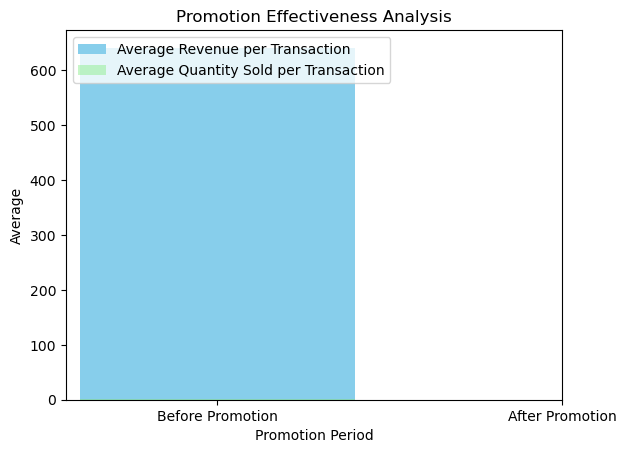

In [23]:
#Promotion Effectiveness Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
sales_data = pd.read_csv("salesforcourse.csv")

# Convert 'Date' column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Define the promotion period (e.g., before and after a specific date)
promotion_start_date = pd.to_datetime('2023-06-01')

# Filter sales data for periods before and after the promotion
sales_before_promotion = sales_data[sales_data['Date'] < promotion_start_date]
sales_after_promotion = sales_data[sales_data['Date'] >= promotion_start_date]

# Calculate total revenue before and after the promotion
revenue_before_promotion = sales_before_promotion['Revenue'].sum()
revenue_after_promotion = sales_after_promotion['Revenue'].sum()

# Calculate total quantity sold before and after the promotion
quantity_before_promotion = sales_before_promotion['Quantity'].sum()
quantity_after_promotion = sales_after_promotion['Quantity'].sum()

# Calculate average revenue per transaction before and after the promotion
avg_revenue_before_promotion = revenue_before_promotion / len(sales_before_promotion)
avg_revenue_after_promotion = revenue_after_promotion / len(sales_after_promotion)

# Calculate average quantity sold per transaction before and after the promotion
avg_quantity_before_promotion = quantity_before_promotion / len(sales_before_promotion)
avg_quantity_after_promotion = quantity_after_promotion / len(sales_after_promotion)

# Visualize the changes in average revenue and quantity sold per transaction before and after the promotion
labels = ['Before Promotion', 'After Promotion']
avg_revenue = [avg_revenue_before_promotion, avg_revenue_after_promotion]
avg_quantity = [avg_quantity_before_promotion, avg_quantity_after_promotion]

x = range(len(labels))

plt.bar(x, avg_revenue, color='skyblue', label='Average Revenue per Transaction')
plt.bar(x, avg_quantity, color='lightgreen', label='Average Quantity Sold per Transaction', alpha=0.5)

plt.xlabel('Promotion Period')
plt.ylabel('Average')
plt.title('Promotion Effectiveness Analysis')
plt.xticks(x, labels)
plt.legend()
plt.show()


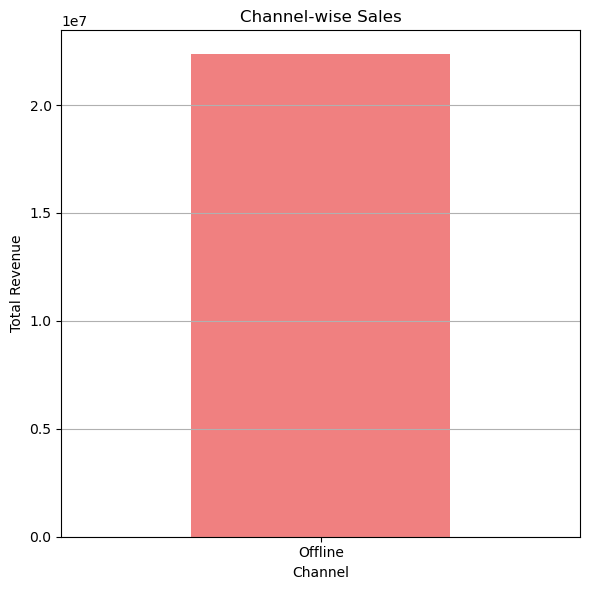

In [24]:
#Channel Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
sales_data = pd.read_csv("salesforcourse.csv")

# Simulate sales channels based on country
# For demonstration purposes, we'll assume two hypothetical channels: Online and Offline
# You may need to adapt this part based on your actual data and business context
sales_data['Channel'] = 'Offline'
sales_data.loc[sales_data['Country'].isin(['USA', 'Canada']), 'Channel'] = 'Online'

# Channel-wise sales analysis
channel_sales = sales_data.groupby('Channel')['Revenue'].sum()

# Plotting channel-wise sales
plt.figure(figsize=(6, 6))
channel_sales.plot(kind='bar', color=['lightcoral', 'lightskyblue'])
plt.title('Channel-wise Sales')
plt.xlabel('Channel')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
